# Weekly Payroll Data Analysis

In [70]:
# import pandas as pd 
import pandas as pd
# import matplotlib pyplot as plt 
import matplotlib.pyplot as plt
# import seaborn as sns
import seaborn as sns

In [71]:
# Weekly payroll dictionary
weekly_payroll = {
    "1.": {"employee": "Linus Breeze", "Rate": "27.50", "Hours": "40.25", "Dependents": "4"},
    "2.": {"employee": "Juan Santiago", "Rate": "18.75", "Hours": "56.00", "Dependents": "1"},
    "3.": {"employee": "James Webb", "Rate": "28.35", "Hours": "38.00", "Dependents": "3"},
    "4.": {"employee": "Kylie Sabol", "Rate": "21.50", "Hours": "46.50", "Dependents": "6"},
    "5.": {"employee": "Amber Ali", "Rate": "19.35", "Hours": "17.00", "Dependents": "2"},
    "6.": {"employee": "Kevin Goldstein", "Rate": "17.05", "Hours": "28.00", "Dependents": "5"}
}

# New Employee information added to the dictionary
weekly_payroll["7."] = {"employee": "Lee Chang",
                        "Rate": "17.05", "Hours": "28.00", "Dependents": "5"}
weekly_payroll["8."] = {"employee": "Albert Fritz",
                        "Rate": "28.35", "Hours": "38.75", "Dependents": "3"}

# One Employee removed from payroll
weekly_payroll.pop("6.")

# Using get function to determine that employee deleted employee is no  longer in the payroll
definition = weekly_payroll.get("6.")
if definition:
    print(definition)
else:
    print("Key doesn't exist")


# wp = weekly payroll nested dictionary 
def extract_info(wp):  
    """ Extract info from nested dictionary

    Arg: 
        Weekly payroll as nested dictionary

    Returns:
        This function retuns list of Employee, Rate, Hours, Dependents
    """


# Empty list for keys
    employee = []
    rate = []
    hours = []
    dependents = []

# For loop nested dictionary
    for i in wp:
        employee.append(wp[i]["employee"])

    for i in wp:
        rate.append(float(wp[i]["Rate"]))

    for i in wp:
        hours.append(float(wp[i]["Hours"]))

    for i in wp:
        dependents.append(float(wp[i]["Dependents"]))
    return employee, rate, hours, dependents


# Total (Gross Pay)
def total_gross_pay(rate, hours):
    tgp = 0  # initial Total Gross pay
    for i in range(len(rate)):
        tgp = tgp + (rate[i] * hours[i])
    tgp = round(tgp, 2)
    return tgp


# Individual Gross Pay with overtime (1.5 per hour for employee with 40 and more hours per week)
def ind_gross_pay(rate, hours):
    igp = []
    for i in range(len(rate)):
        if hours[i] <= 40:
            igp.append(round(rate[i] * hours[i], 2))
        else:
            igp.append(round((rate[i] * hours[i]) +
                       (.5 * rate[i] * (hours[i] - 40)), 2))

    return igp


# State Tax = .06
def state_tax(igp):
    s_tax = []
    for items in igp:
        s_tax.append(round(items * .06, 2))
    return s_tax


# Federal Tax: flat_rate = .22
# Withholding_allowance_per_dependent = 38.46
def federal_tax(igp, dep):
    federal_tax = []
    for i in range(len(igp)):
        federal_tax.append(round(.22*(igp[i]-(dep[i]*38.46)), 2))
    return federal_tax


# Net Pay with Social Security and Medicare deductions
def net_pay(igp, federal_tax, state_tax, social_security, medicare):
    net_pay = []
    for i in range(len(igp)):
        net_pay.append(round(
            igp[i]-(social_security[i] + medicare[i] + federal_tax[i] + state_tax[i]), 2))
    return net_pay



# Social Security deduction  (with maximum amount applied)
def social_security_limited(ind_gross_pay, YTD_Social_Security):
    global Social_Security_Tax
    global Social_Security_Limit
    social_security = []
    for i in range(len(ind_gross_pay)):
        if (YTD_Social_Security[i] + (Social_Security_Tax * ind_gross_pay[i])) >= Social_Security_Limit:
            social_security.append(
                round(Social_Security_Limit - YTD_Social_Security[i], 2))
        else:
            social_security.append(
                round(Social_Security_Tax * ind_gross_pay[i], 2))

    return social_security


# Medicare deduction
def medicare(igp):
    global Medicare_tax
    medicare = []
    for i in range(len(igp)):
        medicare.append(round(igp[i] * Medicare_tax, 2))
    return medicare


Key doesn't exist


In [49]:
# YTD Social Security
YTD_Social_Security = [4974.00, 5540.20, 4254.00, 5553.90, 3447.60]

# New Employee YTD Social Security (added)
YTD_Social_Security.append(4825.50)
YTD_Social_Security.append(5553.90)

# Maximum Social Security
Social_Security_Limit = 5553.90

# My function
def Maindata(wp):
    Employee, Rate, Hours, Dependents = extract_info(wp)
    Ind_Gross_Pay = ind_gross_pay(Rate, Hours)
    State_Tax = state_tax(Ind_Gross_Pay)
    Federal_Tax = federal_tax(Ind_Gross_Pay, Dependents)
    Medicare = medicare(Ind_Gross_Pay)
    Social_Security_Limited = social_security_limited(Ind_Gross_Pay, YTD_Social_Security)
    Net_Pay = net_pay(Ind_Gross_Pay, Federal_Tax, State_Tax, Social_Security_Limited, Medicare)

    Dependents = [int(items) for items in Dependents]

    
    Total_Rate = sum(Rate) #Total Rate
    Total_Hours = sum(Hours) # Total Hours 
    Total_YTD_Social_Security = sum(YTD_Social_Security)  # Total YTD Social Security
    Total_Ind_Gross_Pay = round(sum(Ind_Gross_Pay),2) # Total Ind. Gross Pay
    Total_Social_Security = round(sum(Social_Security_Limited),2) # Total Social Security
    Total_Medicare = sum(Medicare)# Total Medicare 
    Total_Federal_Tax = sum(Federal_Tax) # Total Federal tax
    Total_State_Tax = sum(State_Tax) # Total State Tax 
    Total_Net_Pay = sum(Net_Pay) # Total Net Pay

    Totals = [Total_Rate, Total_Hours, Total_YTD_Social_Security, Total_Ind_Gross_Pay, Total_Social_Security, 
            Total_Medicare, Total_Federal_Tax, Total_State_Tax, Total_Net_Pay]
    
    # Converted the list into the DataFrame
    df = pd.DataFrame([Rate, Hours, YTD_Social_Security, Ind_Gross_Pay, Social_Security_Limited, Medicare, Federal_Tax, State_Tax, Net_Pay],
                  index=['Rate', 'Hours', 'YTD Social Security', 'Ind Gross Pay',
                         'Social Security', 'Medicare', 'Federal Tax', 'State Tax', 'Net Pay'],
                  columns=Employee) 
    df = df.T
    df
    dfTotals = pd.DataFrame([Totals], index= ['Totals'], columns=['Rate', 'Hours', 'YTD Social Security', 'Ind Gross Pay',
                         'Social Security', 'Medicare', 'Federal Tax', 'State Tax', 'Net Pay'])
    return df, dfTotals


In [50]:
# Reading csv and setting it = to payroll tax data (projected social security tax and medicare tax each year)  
payroll_tax_data = pd.read_csv('payroll_tax_data.csv')
rows = payroll_tax_data.shape[0] # counts rows ignoring header

#for case 1
Social_Security_Tax = payroll_tax_data.at[0, "Social_Security_tax"] 
Medicare_tax = payroll_tax_data.at[0, "Medicare_tax"]
df2021, df2021totals = Maindata(weekly_payroll) # Take returned objects from maindata and assigns them to F-strings based on the year 

#for case 2
Social_Security_Tax = payroll_tax_data.at[1, "Social_Security_tax"] 
Medicare_tax = payroll_tax_data.at[1, "Medicare_tax"]
df2022, df2022totals = Maindata(weekly_payroll) # Take returned objects from maindata and assigns them to F-strings based on the year 

#for case 3
Social_Security_Tax = payroll_tax_data.at[2, "Social_Security_tax"] 
Medicare_tax = payroll_tax_data.at[2, "Medicare_tax"]
df2023, df2023totals = Maindata(weekly_payroll) # Take returned objects from maindata and assigns them to F-strings based on the year 


payroll_tax_data.head() 


,Case,Year,Social_Security_tax,Medicare_tax
0,1,2021,0.062,0.0145
1,2,2022,0.080,0.0275
2,3,2023,0.105,0.0225


In [51]:
# The DataFrame displays combined results of each column and its sum of  totals

dfcase1 = pd.concat([df2021, df2021totals])

dfcase2 = pd.concat([df2022, df2022totals])

dfcase3 = pd.concat([df2023, df2023totals])

dfcase1



,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
Linus Breeze,27.50,40.25,4974.0,1110.31,68.84,16.10,210.42,66.62,748.33
Juan Santiago,18.75,56.00,5540.2,1200.00,13.70,17.40,255.54,72.00,841.36
James Webb,28.35,38.00,4254.0,1077.30,66.79,15.62,211.62,64.64,718.63
Kylie Sabol,21.50,46.50,5553.9,1069.62,0.00,15.51,184.55,64.18,805.38
Amber Ali,19.35,17.00,3447.6,328.95,20.39,4.77,55.45,19.74,228.60
Lee Chang,17.05,28.00,4825.5,477.40,29.60,6.92,62.72,28.64,349.52
Albert Fritz,28.35,38.75,5553.9,1098.56,0.00,15.93,216.30,65.91,800.42
Totals,160.85,264.50,34149.1,6362.14,199.32,92.25,1196.60,381.73,4492.24


[]

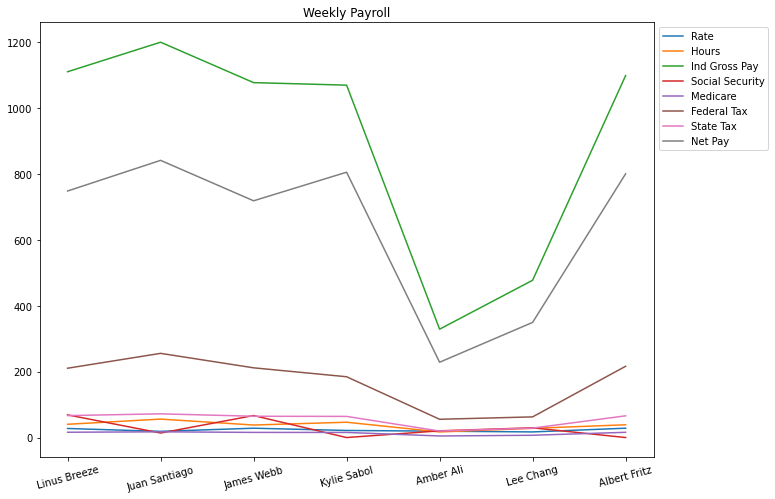

In [52]:
# Weekly Payroll Data for each employee is plotted in the line graph format   
df2021new = df2021.drop("YTD Social Security", axis = 'columns')
x = df2021new.plot(kind='line',rot = 15,title = 'Weekly Payroll', figsize=(11,8))
x.legend(bbox_to_anchor=(1.0,1.0))
x.plot()


In [53]:
# Summary of dataset
df2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Linus Breeze to Albert Fritz
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rate                 7 non-null      float64
 1   Hours                7 non-null      float64
 2   YTD Social Security  7 non-null      float64
 3   Ind Gross Pay        7 non-null      float64
 4   Social Security      7 non-null      float64
 5   Medicare             7 non-null      float64
 6   Federal Tax          7 non-null      float64
 7   State Tax            7 non-null      float64
 8   Net Pay              7 non-null      float64
dtypes: float64(9)
memory usage: 560.0+ bytes


In [54]:
# Dimensions of dataset(7 rows and 9 columns)  
df2021.shape

(7, 9)

In [55]:
# Check for missing values
df2021.isnull().sum()

Rate                   0
Hours                  0
YTD Social Security    0
Ind Gross Pay          0
Social Security        0
Medicare               0
Federal Tax            0
State Tax              0
Net Pay                0
dtype: int64

In [56]:
# astype() function converts item/s to (float, integer, object or string) all of the items below are integers.  
# Original file if a float the current display is an int 
df2021.astype(int)

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
Linus Breeze,27,40,4974,1110,68,16,210,66,748
Juan Santiago,18,56,5540,1200,13,17,255,72,841
James Webb,28,38,4254,1077,66,15,211,64,718
Kylie Sabol,21,46,5553,1069,0,15,184,64,805
Amber Ali,19,17,3447,328,20,4,55,19,228
Lee Chang,17,28,4825,477,29,6,62,28,349
Albert Fritz,28,38,5553,1098,0,15,216,65,800


In [57]:
# All info. of a single employee
df2021.loc["Linus Breeze"]

Rate                     27.50
Hours                    40.25
YTD Social Security    4974.00
Ind Gross Pay          1110.31
Social Security          68.84
Medicare                 16.10
Federal Tax             210.42
State Tax                66.62
Net Pay                 748.33
Name: Linus Breeze, dtype: float64

In [58]:
# single value for row/columns par
df2021.iloc[5:6, 1:2]

,Hours
Lee Chang,28.0


In [59]:
# Employee with overtime
df2021.loc[df2021["Hours"] > 40]

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
Linus Breeze,27.50,40.25,4974.0,1110.31,68.84,16.10,210.42,66.62,748.33
Juan Santiago,18.75,56.00,5540.2,1200.00,13.70,17.40,255.54,72.00,841.36
Kylie Sabol,21.50,46.50,5553.9,1069.62,0.00,15.51,184.55,64.18,805.38


In [60]:
# Employee who reached Social Security Limit for a year
df2021.loc[df2021["YTD Social Security"] >= 5553.90]

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
Kylie Sabol,21.50,46.50,5553.9,1069.62,0.0,15.51,184.55,64.18,805.38
Albert Fritz,28.35,38.75,5553.9,1098.56,0.0,15.93,216.30,65.91,800.42


(3000.0, 6000.0)

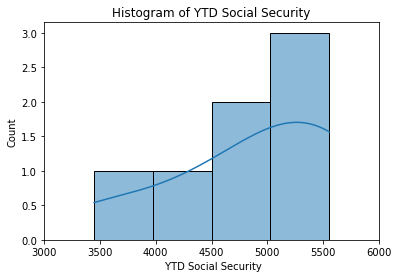

In [61]:
# Histogram for YTD Social Security
hist = sns.histplot(df2021['YTD Social Security'],kde =True)
hist.set_title("Histogram of YTD Social Security")
hist.set_xlabel(' YTD Social Security')
hist.set_xlim([3000,6000])


In [62]:
# Histogram for YTD Social Security is skewd to the left away from mean
df2021['YTD Social Security'].skew()

-1.0492049825068777

In [63]:
# Table case 1 Year 2021 (sstax 0.062 and medtax 0.0145)
dfcase1.iloc[ :, [2, 4,5,8]]

,YTD Social Security,Social Security,Medicare,Net Pay
Linus Breeze,4974.0,68.84,16.10,748.33
Juan Santiago,5540.2,13.70,17.40,841.36
James Webb,4254.0,66.79,15.62,718.63
Kylie Sabol,5553.9,0.00,15.51,805.38
Amber Ali,3447.6,20.39,4.77,228.60
Lee Chang,4825.5,29.60,6.92,349.52
Albert Fritz,5553.9,0.00,15.93,800.42
Totals,34149.1,199.32,92.25,4492.24


In [64]:
#Table case 2 Year 2022(sst 0.080 and medtax 0.0275) assumption
dfcase2.iloc[ :, [2, 4,5, 8]]

,YTD Social Security,Social Security,Medicare,Net Pay
Linus Breeze,4974.0,88.82,30.53,713.92
Juan Santiago,5540.2,13.70,33.00,825.76
James Webb,4254.0,86.18,29.63,685.23
Kylie Sabol,5553.9,0.00,29.41,791.48
Amber Ali,3447.6,26.32,9.05,218.39
Lee Chang,4825.5,38.19,13.13,334.72
Albert Fritz,5553.9,0.00,30.21,786.14
Totals,34149.1,253.21,174.96,4355.64


In [65]:
#Table case 3 Year 2023(sst 0.105and medtax 0.0225) assumption
dfcase3.iloc[ :, [2, 4,5,8]]

,YTD Social Security,Social Security,Medicare,Net Pay
Linus Breeze,4974.0,116.58,24.98,691.71
Juan Santiago,5540.2,13.70,27.00,831.76
James Webb,4254.0,113.12,24.24,663.68
Kylie Sabol,5553.9,0.00,24.07,796.82
Amber Ali,3447.6,34.54,7.40,211.82
Lee Chang,4825.5,50.13,10.74,325.17
Albert Fritz,5553.9,0.00,24.72,791.63
Totals,34149.1,328.07,143.15,4312.59


In [66]:
# Method 1 
# Summary statistics about data
# The describe() function gives us (numerical data) for count, mean, standard deviation(std), minimum, Q1(25%), 
# median(50%), Q3(75%), IQR(Q3 - Q1) and maximum values. 
df2021.describe()

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,22.978571,37.785714,4878.442857,908.877143,28.474286,13.178571,170.942857,54.532857,641.748571
std,4.941816,12.533645,795.778602,350.713521,28.878935,5.085854,79.228533,21.042988,246.696921
min,17.050000,17.000000,3447.600000,328.950000,0.000000,4.770000,55.450000,19.740000,228.600000
25%,19.050000,33.000000,4539.750000,773.510000,6.850000,11.215000,123.635000,46.410000,534.075000
50%,21.500000,38.750000,4974.000000,1077.300000,20.390000,15.620000,210.420000,64.640000,748.330000
75%,27.925000,43.375000,5547.050000,1104.435000,48.195000,16.015000,213.960000,66.265000,802.900000
max,28.350000,56.000000,5553.900000,1200.000000,68.840000,17.400000,255.540000,72.000000,841.360000


In [67]:
# METHOD 2 (Extracting Stastistical Data Manually)
# CENTRALITY MEASURES (mean, median, & mode)
df2021.mean() # Mean (average value that is equal to the ration of sum of values in a data set)
df2021.median() # Median (the central value of given set of values when arranged in an order) 
df2021.mode() # Mode (the most repetitive value of a given set of values has a high frequency or appears more frequently)
              # Nan (illustrates that computer cannot represent a value for mode)              

,Rate,Hours,YTD Social Security,Ind Gross Pay,Social Security,Medicare,Federal Tax,State Tax,Net Pay
0,28.35,17.00,5553.9,328.95,0.0,4.77,55.45,19.74,228.60
1,NaN,28.00,NaN,477.40,NaN,6.92,62.72,28.64,349.52
2,NaN,38.00,NaN,1069.62,NaN,15.51,184.55,64.18,718.63
3,NaN,38.75,NaN,1077.30,NaN,15.62,210.42,64.64,748.33
4,NaN,40.25,NaN,1098.56,NaN,15.93,211.62,65.91,800.42
5,NaN,46.50,NaN,1110.31,NaN,16.10,216.30,66.62,805.38
6,NaN,56.00,NaN,1200.00,NaN,17.40,255.54,72.00,841.36


In [68]:
# DISPERSION MEASURES (minimum and maximum values, range, variance, standard-deviation, Q1, Q2, Q3, & IQR)
df2021.min() # Minimum
df2021.max() # Maximum
df2021.max() - df2021.min() # Range (Measures the difference between the minimum and maximum value in a dataset)
df2021.var() # Variance (Measure of how data points differ from the mean) 
df2021.std() # Standard Deviation (Measures the typical deviation of individual values from the mean value in a dataset)

Q1 = df2021.quantile(0.25) # 25 percentile (Q1)
Q1

Q2 = df2021.quantile(0.5) # 50 percentile (Q2) or # Median
Q2

Q3 = df2021.quantile(0.75) # 75 percentile (Q3)
Q3

IQR = Q3 - Q1 # Interquartile Range(IQR) (The difference between the first quartile (Q1) and the third quartile (Q3) of the dataset)
IQR



Rate                      8.875
Hours                    10.375
YTD Social Security    1007.300
Ind Gross Pay           330.925
Social Security          41.345
Medicare                  4.800
Federal Tax              90.325
State Tax                19.855
Net Pay                 268.825
dtype: float64

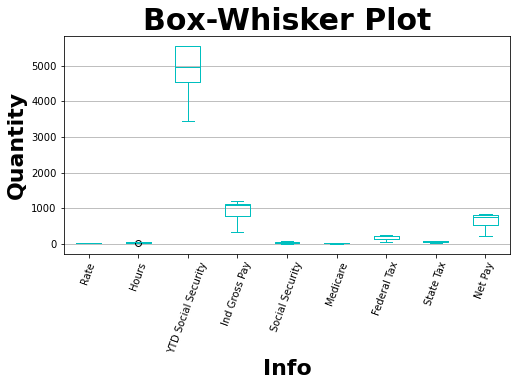

In [69]:
# Box-Whisker plot   # plt.bar(x,y)
font = {'family' : 'normal', 
        'color' : 'k',
        'weight' : 'bold',
        'size'   : 22}       

font2 = {'family' : 'normal', 
        'color' : 'k',
        'weight' : 'bold',
        'size'   : 30}      

plt = df2021.boxplot(rot=70, color= 'c', figsize=(8,4))
plt.set_title('Box-Whisker Plot', fontdict= font2)
plt.set_xlabel('Info', fontdict= font)
plt.set_ylabel('Quantity', fontdict= font)
# plt.spines['left'].set_color('black')
plt.grid(axis='x')
